# Debopam Das

### Task:- Exploratory Data Analysis on Global Terrorism, find out hot zones of terrorism,and security issues.

### collecting necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

## The Data

### The data is the records of incidents of terrorism around the globe


## My Strategy is to do a filtering of data to derive answers to security questions

In [2]:
raw_data=pd.read_csv(r'C:\Users\DEBOPAM DAS\Desktop\New folder\GRIP_may_21\globalterrorismdb_0718dist.csv',encoding='latin1')

C:\Users\DEBOPAM DAS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
raw_data.shape

(181691, 135)

In [5]:
raw_data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
raw_data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### here i cleaned the columns with 60% or more data missing

In [7]:
(181691*60)/100

109014.6

In [8]:

for i in raw_data.columns:
    a=raw_data[i]
    b=a.isnull().sum()
    if b > 109014.6:
        raw_data.drop([i],axis=1,inplace=True)
print(raw_data.columns.values)

['eventid' 'iyear' 'imonth' 'iday' 'extended' 'country' 'country_txt'
 'region' 'region_txt' 'provstate' 'city' 'latitude' 'longitude'
 'specificity' 'vicinity' 'summary' 'crit1' 'crit2' 'crit3' 'doubtterr'
 'multiple' 'success' 'suicide' 'attacktype1' 'attacktype1_txt'
 'targtype1' 'targtype1_txt' 'targsubtype1' 'targsubtype1_txt' 'corp1'
 'target1' 'natlty1' 'natlty1_txt' 'gname' 'guncertain1' 'individual'
 'nperps' 'nperpcap' 'claimed' 'weaptype1' 'weaptype1_txt' 'weapsubtype1'
 'weapsubtype1_txt' 'weapdetail' 'nkill' 'nkillus' 'nkillter' 'nwound'
 'nwoundus' 'nwoundte' 'property' 'ishostkid' 'ransom' 'scite1' 'scite2'
 'dbsource' 'INT_LOG' 'INT_IDEO' 'INT_MISC' 'INT_ANY']


In [9]:
raw_data.head().T

,0,1,2,3,4
eventid,197000000001,197000000002,197001000001,197001000002,197001000003
iyear,1970,1970,1970,1970,1970
imonth,7,0,1,1,1
iday,2,0,0,0,0
extended,0,0,0,0,0
country,58,130,160,78,101
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan
region,2,1,5,8,4
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia
provstate,NaN,Federal,Tarlac,Attica,Fukouka


### 10 countries with highest amount of attacks

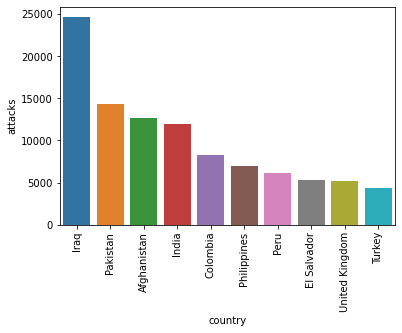

In [10]:
a=raw_data['country_txt'].value_counts().reset_index()
a.columns=['country','attacks']
a=a.head(10)
sns.barplot(a['country'],a['attacks'])
plt.xticks(rotation=90)
plt.show()

### year with highest amount of attacks

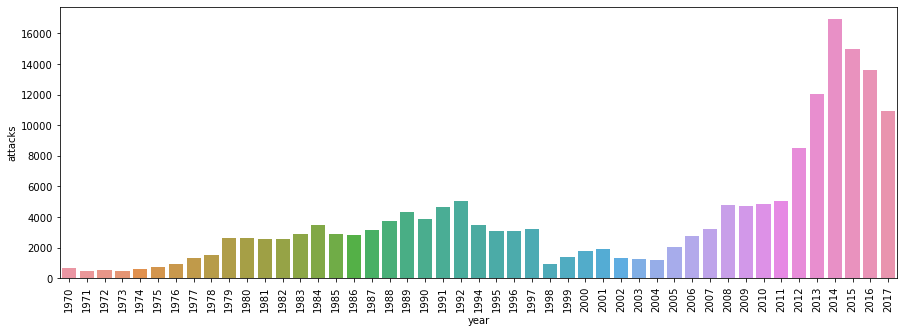

In [11]:
a=raw_data['iyear'].value_counts().reset_index()
a.columns=['year','attacks']
plt.figure(figsize=(15,5))
sns.barplot(a['year'],a['attacks'])
plt.xticks(rotation=90)
plt.show()

### attack type at year 2014 in Iraq

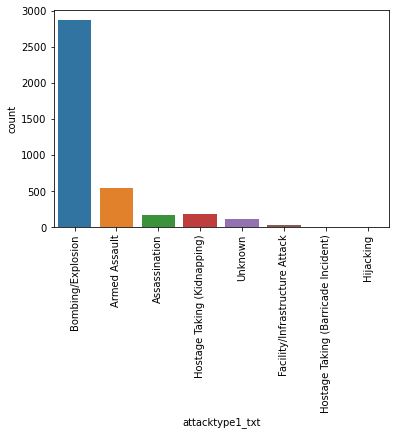

In [50]:
a=raw_data['iyear']==2014
b=raw_data['country_txt']=='Iraq'
c=a&b
d=raw_data['attacktype1_txt']
e=d[c]
sns.countplot(e)
plt.xticks(rotation=90)
plt.show()

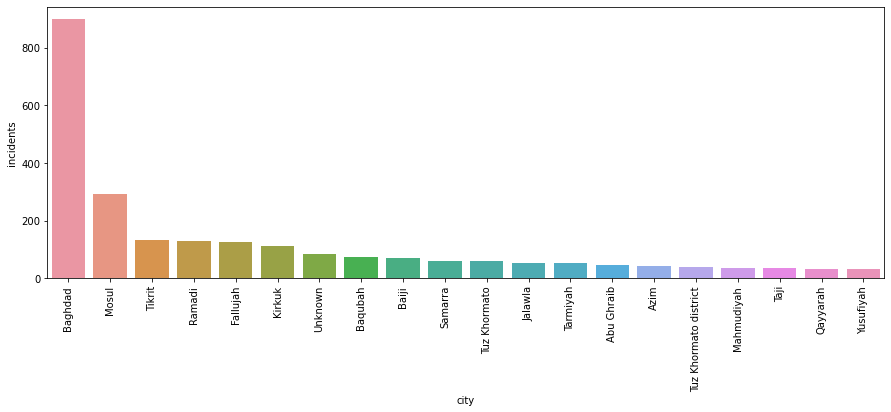

In [48]:
a=raw_data['iyear']==2014
b=raw_data['country_txt']=='Iraq'
c=a&b
d=raw_data['city']
e=d[c].value_counts().head(20)
f=e.index
g=e.values
h=pd.DataFrame({'city':f,'incidents':g})
plt.figure(figsize=(15,5))
sns.barplot(h['city'],h['incidents'])
plt.xticks(rotation=90)
plt.show()

### their target

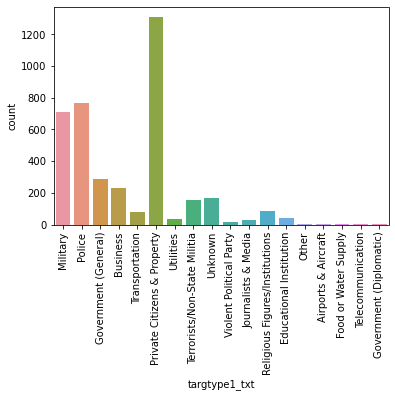

In [14]:
a=raw_data['iyear']==2014
b=raw_data['country_txt']=='Iraq'
c=a&b
d=raw_data['targtype1_txt']
e=d[c]
sns.countplot(e)
plt.xticks(rotation=90)
plt.show()

### wepons uesed on target type :- Private citizens and Property

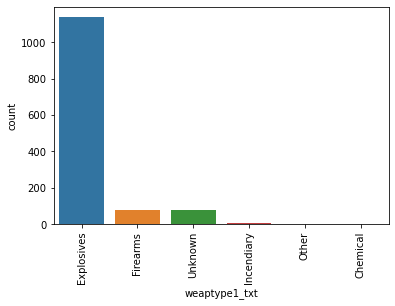

In [15]:
a=raw_data['iyear']==2014
b=raw_data['country_txt']=='Iraq'
c=a&b
d=raw_data['targtype1_txt']=='Private Citizens & Property'
e=c&d
f=raw_data['weaptype1_txt']
g=f[e]
sns.countplot(g)
plt.xticks(rotation=90)
plt.show()

# Conclution

### in the year 2014 Iraq was highly terrorized by bombing and the use of explosive on citizens and public property, the defense agency could use some measures to prevent that in future


## this same process of filtering can be used on any country in any year to analzie the criminal intrests and take steps to prevent crime